In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_set = []
for x in range(10):
    data_set.append(4 * x + 5)

print (data_set)


[5, 9, 13, 17, 21, 25, 29, 33, 37, 41]


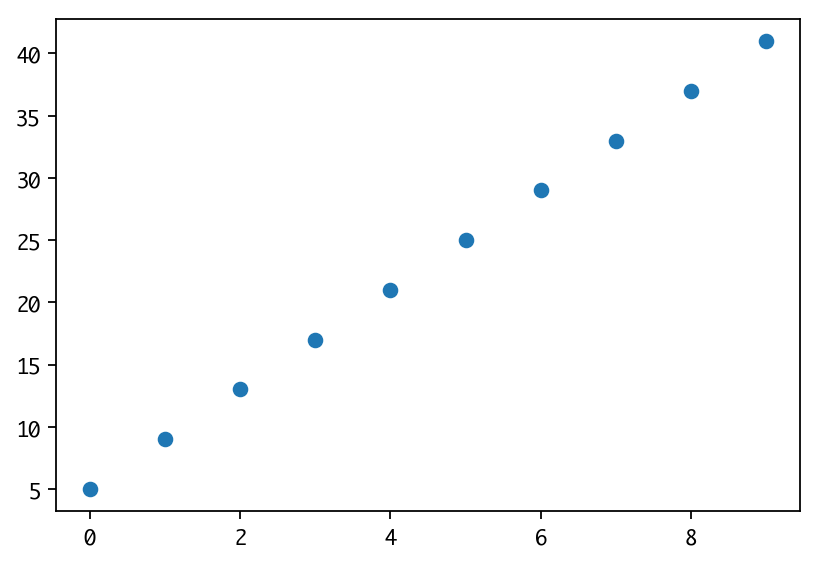

In [3]:
plt.plot(data_set, 'o')

In [4]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
y = tf.matmul(x, w)
t = tf.placeholder(tf.float32, [None, 1])
loss = tf.reduce_sum(tf.square(y - t))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
train_t = np.array(data_set)
print(train_t)
train_t = train_t.reshape([10, 1])
print(train_t)
train_x = np.zeros([10, 2])

for row in range(10):
    for col in range(2):
        train_x[row][col] = row ** col

print(train_x)

[ 5  9 13 17 21 25 29 33 37 41]
[[ 5]
 [ 9]
 [13]
 [17]
 [21]
 [25]
 [29]
 [33]
 [37]
 [41]]
[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]]


In [7]:
i = 0
for _ in range(5000):
    i += 1
    sess.run(train_step, feed_dict={x: train_x, t: train_t})
    if i % 1000 == 0:
        loss_val = sess.run(loss, feed_dict={x: train_x, t:train_t})
        print('Step: %d, Loss: %f' %  (i, loss_val))

Step: 1000, Loss: 3937.995117
Step: 2000, Loss: 2136.409668
Step: 3000, Loss: 999.152832
Step: 4000, Loss: 366.879486
Step: 5000, Loss: 89.717026


In [8]:
w_val = sess.run(w)
print (w_val)

[[ 3.693928  ]
 [ 3.66081333]]


In [9]:
def predict(x):
    result = 0.0
    for n in range(2):
        result += w_val[n][0]*x**n
    return result

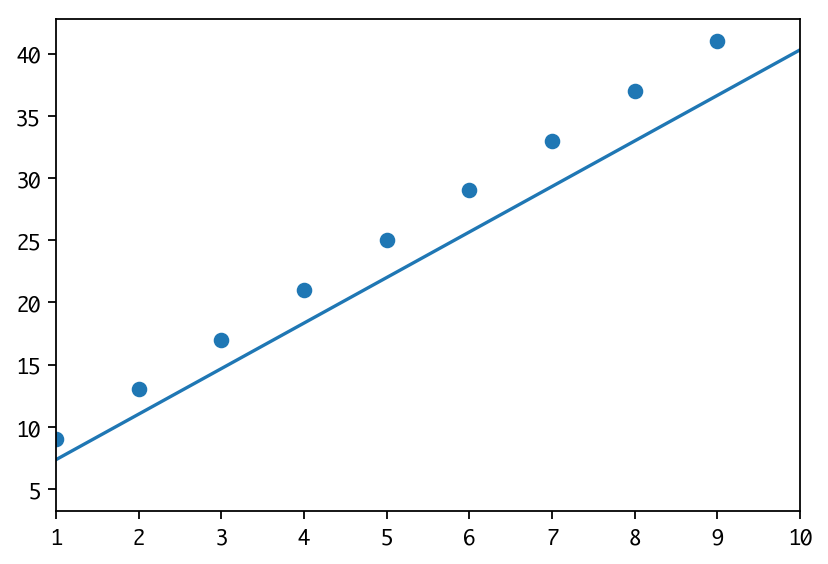

In [10]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 10)
subplot.scatter(range(10), train_t)
linex = np.linspace(1, 10, 100)
liney = predict(linex)
subplot.plot(linex, liney)